# Exam 2, Fall 2021 (100 pts total)

files needed = ('pl.csv', 'nval.csv', 'wdi_q4.csv') which can be found in `exam2_f21s1_data.zip`

You have 75 minutes to complete this exam.

Answer all the questions below in this notebook. You should insert as many cells into the notebook as you need. When you are finished, upload your finished notebook to Canvas. 

* You may use your notes and the Internet, but you cannot work with others.  
* Import any packages you need to complete this exam.
* Do not modify the data files. All data manipulation should happen in your code.

**A word on plotting:** At this point in the course, I expect you to create graphically excellent visualizations. 

Remember, jupyter notebooks and python have lots of built in help facilities. 

## Question 0 (5 points): Last, First
 
Replace 'Last, First' above with your actual name. Enter it as: last name, first name.

## Question 1 (15 points): Time series/APIs 

1. From FRED, retrieve the daily price of oil (DCOILWTICO).  
2. Compute the average price of oil in 2020 and 2021. Print them out as: 

   "The mean price per barrel of oil in 2020 is \\$xx.xx and in 2021 is $xx.xx."

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web 

oil = web.DataReader('DCOILWTICO', 'fred', '2018-01-01')
strout = 'The mean price per barrel of oil in 2020 is ${0:5.2f} and in 2021 is ${1:5.2f}.'
print(strout.format(oil.loc['2020', 'DCOILWTICO'].mean(), oil.loc['2021', 'DCOILWTICO'].mean()))


The mean price per barrel of oil in 2020 is $39.16 and in 2021 is $67.46.


## Question 2A (15 points): Merging 

1. Load the files 'pl.csv' and 'nval.csv'. They contain the price index and nominal value added by U.S. industries for 2010&ndash;2020.
2. Merge the two DataFrames together. 
3. In the merged DataFrame, compute real value added by industry:

$$\text{real value added} = \frac{\text{nominal value added}}{\text{price index/100}}.$$

4. Print out the top 2 rows of your DataFrame.

In [2]:
# Code to create the long files to use in the excercise.

# nva = pd.read_csv('nva.csv', header=4)
# nva = nva.rename(columns={'Unnamed: 1': 'ind'})
# nva = nva.drop('Line', axis=1)
# nva = nva.set_index('ind').stack().reset_index()
# nva.columns=['ind', 'year', 'nva']
# nva.to_csv('nval.csv', index=False)

# p = pd.read_csv('p.csv', header=4)
# p = p.rename(columns={'Unnamed: 1': 'ind'})
# p = p.drop('Line', axis=1)
# p = p.set_index('ind').stack().reset_index()
# p.columns=['ind', 'year', 'p']
# p.to_csv('pl.csv', index=False)

In [3]:
p = pd.read_csv('pl.csv')
nva = pd.read_csv('nval.csv')
ind = pd.merge(left=p, right=nva, on=['ind', 'year'], how='inner')
ind['rva'] = ind['nva']/(ind['p']/100)
ind = ind.sort_index()
ind.to_csv('q2a_f21.csv', index=False)
ind.head(2)

,ind,year,p,nva,rva
0,Gross domestic product,2010,96.164,15049.0,15649.307433
1,Gross domestic product,2011,98.157,15599.7,15892.600630


## Question 2B (15 points): Indexing

If you completed question 2A, use your results in this question. If not, use the file 'q2a_f21.csv' to complete this question.

1. Report real value added for "Utilities" in 2015. 
2. Print it out as: 

   "Real value added in utilities is xxx.xx billion dollars."

In [4]:
ind = pd.read_csv('q2a_f21.csv')

ind['ind'] = ind['ind'].str.strip()
ind = ind.set_index(['ind', 'year']).sort_index()

strout = 'Real value added in utilities is {0:5.2f} billion dollars.'

print(strout.format(ind.loc[('Utilities', 2015), 'rva'].values[0]))

Real value added in utilities is 266.36 billion dollars.


## Question 3 (15 points): Groupby/Plotting
If you completed question 2A, use your results in this question. If not, use the file 'q2a_f21.csv' to complete this question.

1. Compute the average real value added and the median real value added for each industry, 2010&ndash;2020.
2. Drop 'Gross domestic product' and 'Private industries'. (If you have trouble dropping these industries, skip this step and go to step 3.)
3. Create a scatter plot with a regression line. Average real value added by industry is the y-axis and median real value added by industry is the x-axis.
    1. Use black for the scatter points and the line
    1. Do not plot a confindence interval

In [5]:
ind = pd.read_csv('q2a_f21.csv')
ind['ind'] = ind['ind'].str.strip()

ind_means = ind[['ind','rva']].groupby('ind').agg(['mean', 'median'])
ind_means = ind_means.drop(['Gross domestic product', 'Private industries'])
ind_means = ind_means.droplevel(level=0, axis=1)

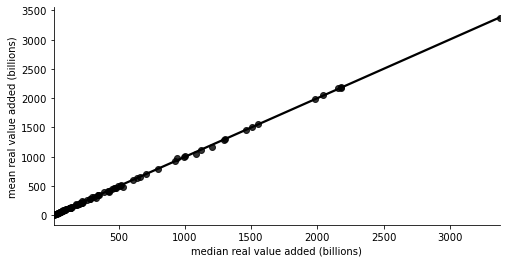

In [6]:

fig, ax = plt.subplots(figsize=(8,4))
sns.regplot(data=ind_means, y='mean', x='median', color='black', ci=0)
ax.set_ylabel('mean real value added (billions)')
ax.set_xlabel('median real value added (billions)')
sns.despine()

## Question 4 (15 points): Reshaping 

The file 'wdi_q4.csv' contains data on real GDP and the working age population (15-64 years) for China and Japan from 1970 to 2019. 

1. Compute the ratio of GDP to the working age population for both countries for all years. Name the variable 'gdpc'.
2. Arrange your DataFrame so that the index is the country (outermost index) and date (innermost index) and the columns are the variable names. Sort both of the indexes. 
3. Print out the first two rows of your DataFrame.

In [7]:
# Code to create wdi_q4.csv
# wdi = pd.read_csv('wdi_e2.csv', index_col=['DATE', 'var', 'cty']).unstack(['cty'])
# wdi = wdi.droplevel(level=0,axis=1)
# wdi.columns
# wdi.to_csv('wdi_q4.csv')
# wdi.head()

In [8]:
wdi = pd.read_csv('wdi_q4.csv', index_col=['DATE', 'var'])
wdi = wdi.stack()
wdi = wdi.unstack('var')
wdi.index = wdi.index.swaplevel()
wdi['gdpc'] = wdi['gdp']/wdi['pop']
wdi = wdi.sort_index()
wdi = wdi.sort_index(axis=1)
wdi.head(2)

var                    gdp      gdpc        pop
    DATE                                       
chn 1970-01-01  228.510558  4.091890  55.844752
    1971-01-01  238.014715  4.268637  55.758953

## Question 5 (15 points): Transformations

Create the `dogs` DataFrame and use pandas funtions to:

1. Remove the '\n' characters from the dogs' names.
3. Create a new column in `dogs` named `year` that holds the year in which each dog was born.
4. In the column `sex`, replace 0 with the text 'good boy' and 1 with the text 'good girl'.
5. Print out `dogs` 

```python
dogs = pd.DataFrame({'name':['Buster\n', 'Subee\n', 'Jax', 'Izzy'], 
                     'dob':['2005-05-06', '2005-10-07', '2019-07-15', '2020-12-22'],
                    'sex':[0,1,0,1]})
```

In [9]:
dogs = pd.DataFrame({'name':['Buster\n', 'Subee\n', 'Jax', 'Izzy'], 
                     'dob':['2005-05-06', '2005-10-07', '2019-07-15', '2020-12-22'],
                    'sex':[0,1,0,1]})

dogs['name'] = dogs['name'].str.strip('\n')
dogs['year'] = dogs['dob'].str.slice(0,4)
dogs['sex'] = dogs['sex'].replace({0:'good boy', 1:'good girl'})
dogs

,name,dob,sex,year
0,Buster,2005-05-06,good boy,2005
1,Subee,2005-10-07,good girl,2005
2,Jax,2019-07-15,good boy,2019
3,Izzy,2020-12-22,good girl,2020


You are finished! Upload your completed notebook to Canvas. 

Enjoy the break, and I will see you next Monday.